# Machine Learning
Jonathan V. Taylar<br>
Doctor of Engineering Major in Computer Engineering

# Machine Learning

## What Is Machine Learning?

Machine Learning is the science (and art) of programming computers so
they can learn from data.

Here is a slightly more general definition:
"Machine Learning is the field of study that gives computers the ability
to learn without being explicitly programmed."
—Arthur Samuel, 1959

And a more engineering-oriented one:

"A computer program is said to learn from experience E with respect to
some task T and some performance measure P, if its performance on T,
as measured by P, improves with experience E."
—Tom Mitchell, 1997


## Examples of Applications
Let’s look at some concrete examples of Machine Learning tasks, along
with the techniques that can tackle them:

- Analyzing images of products on a production line to automatically classify them
- Detecting tumors in brain scans
- Automatically classifying news articles
- Automatically flagging offensive comments on discussion forums
- Summarizing long documents automatically
- Creating a chatbot or a personal assistant
- Forecasting your company’s revenue next year, based on many performance metrics
- Making your app react to voice commands
- Detecting credit card fraud
- Segmenting clients based on their purchases so that you can design a different marketing strategy for each segment
- Representing a complex, high-dimensional dataset in a clear and insightful diagram
- Recommending a product that a client may be interested in, based on past purchases
- Building an intelligent bot for a game

## Types of Machine Learning Systems


- Machine learning involves coding programs that automatically adjust their performance in accordance with their exposure to information in data. 
- This learning is achieved via a parameterized model with tunable parameters that are automatically adjusted according to different performance criteria. 
- Machine learning can be considered a subfield of artificial intelligence (AI) and we can roughly divide the field into the following three major classes.

1. **Supervised learning**: Algorithms which learn from a training set of labeled examples (exemplars) to generalize to the set of all possible inputs. Examples of techniques in supervised learning: logistic regression, support vector machines, decision trees, random forest, etc.
2. **Unsupervised learning**: Algorithms that learn from a training set of unlabeled examples. Used to explore data according to some statistical, geometric or similarity criterion. Examples of unsupervised learning include k-means clustering and kernel density estimation. 
3. **Reinforcement learning**: Algorithms that learn via reinforcement from criticism that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space.

This module focuses on a particular class of supervised machine learning: **classification**. As a data scientist, the first step you apply given a certain problem is to identify the question to be answered. According to the type of answer we are seeking, we are directly aiming for a certain set of techniques.

If our question is answered by **YES/NO**, we are facing a classification problem. Classifiers are also the tools to use if our question admits only a discrete set of answers, i.e., we want to select from a finite number of choices.

- Given the results of a clinical test, e.g., does this patient suffer from diabetes?
- Given a magnetic resonance image, is it a tumor shown in the image?
- Given the past activity associated with a credit card, is the current operation fraudulent?

If our question is a **prediction** of a real-valued quantity, we are faced with a regression problem.

- Given the description of an apartment, what is the expected market value of the flat? What will the value be if the apartment has an elevator?
- Given the past records of user activity on Apps, how long will a certain client be connected to our App?
- Given my skills and marks in computer science and maths, what mark will I achieve in a data science course?



# Linear Regression

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

## Simple Regression
Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

$y=mx+b$

## Multivariable regression

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

$ f(x,y,z)=w1x+w2y+w3z$ <br><br>
The variables x,y,z represent the attributes, or distinct pieces of information, we have about each observation. For sales predictions, these attributes might include a company’s advertising spend on radio, TV, and newspapers.

$Sales=w1Radio+w2TV+w3News$

In [2]:
# Sample Simple Linear Regression

import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [9]:
df_train

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
...,...,...
695,58,58.595006
696,93,94.625094
697,82,88.603770
698,66,63.648685


In [10]:
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [13]:
x_train = df_train['x'].dropna()
y_train = df_train['y'].dropna()
x_test = df_test['x'].dropna()
y_test = df_test['y'].dropna()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [14]:
x_train.shape

(700, 1)

In [15]:
y_train.shape

(700,)

We use pandas library to read the train and test files. We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) we reshape them so that we could feed them into our linear regression model.

In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(r2_score(y_test,y_pred))

0.9888016427276151


We use scikit learn to import the linear regression model. we fit the model on the training data and predict the values for the testing data. We use R2 score to measure the accuracy of our model.

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

$R-squared = Explained variation / Total variation$

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline that I’ll talk about both in this post and my next post.

## Multiple Regression
Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In [17]:
# Let try to import the data
import pandas as pd

df = pd.read_csv("cars.csv")
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [18]:
# X will be our independent values
X = df[['Weight', 'Volume']]
y = df['CO2']

In [22]:
X.shape

(36, 2)

In [23]:
y.shape

(36,)

In [24]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [28]:
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:

predictedCO2 = regr.predict([[2300,1300]])
print(predictedCO2)

[107.2087328]


We have predicted that a car with 1.3 liter engine, and a weight of 2300 kg, will release approximately 107 grams of CO2 for every kilometer it drives.

In [27]:
print(regr.coef_)

[0.00755095 0.00780526]


The result array represents the coefficient values of weight and volume.

- Weight: 0.00755095
- Volume: 0.00780526

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

In [29]:
# What if we increase the weight with 1000kg?

import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


We have predicted that a car with 1.3 liter engine, and a weight of 3300 kg, will release approximately 115 grams of CO2 for every kilometer it drives.

Which shows that the coefficient of 0.00755095 is correct:

107.2087328 + (1000 * 0.00755095) = 114.75968



## Polynomial Regression

Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial. The Polynomial Regression equation is given below:<br><br>
$y= b0+b1x1+ b2x12+ b2x13+...... bnx1n$

- It is also called the special case of Multiple Linear Regression in ML. Because we add some polynomial terms to the Multiple Linear regression equation to convert it into Polynomial Regression.
- It is a linear model with some modification in order to increase the accuracy.
- The dataset used in Polynomial regression for training is of non-linear nature.
- It makes use of a linear regression model to fit the complicated and non-linear functions and datasets.
- Hence, "In Polynomial regression, the original features are converted into Polynomial features of required degree (2,3,..,n) and then modeled using a linear model."


**When do we apply Polynomial regression?**


The need of Polynomial Regression in ML can be understood in the below points:

- If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.
- So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png width=450>

- In the above image, we have taken a dataset which is arranged non-linearly. So if we try to cover it with a linear model, then we can clearly see that it hardly covers any data point. On the other hand, a curve is suitable to cover most of the data points, which is of the Polynomial model.
- Hence, if the datasets are arranged in a non-linear fashion, then we should use the Polynomial Regression model instead of Simple Linear Regression.

### Equation of the Polynomial Regression Model:

Simple Linear Regression equation:         $y = b0+b1x  $       .........(a)

Multiple Linear Regression equation:       $y= b0+b1x+ b2x2+ b3x3+....+ bnxn  $       .........(b)

Polynomial Regression equation:            $y= b0+b1x + b2x2+ b3x3+....+ bnxn $       ..........(c)





**Problem Description:** There is a Human Resource company, which is going to hire a new candidate. The candidate has told his previous salary 160K per annum, and the HR have to check whether he is telling the truth or bluff. So to identify this, they only have a dataset of his previous company in which the salaries of the top 10 positions are mentioned with their levels. By checking the dataset available, we have found that there is a non-linear relationship between the Position levels and the salaries. Our goal is to build a Bluffing detector regression model, so HR can hire an honest candidate. Below are the steps to build such a model.

In [30]:
# Sample Polynomial Regression 
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('Position_Salaries.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, 1:2].values  
y= data_set.iloc[:, 2].values  


In [31]:
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [33]:
x.shape

(10, 1)

In [35]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In the above lines of code, we have imported the important Python libraries to import dataset and operate on it.
Next, we have imported the dataset 'Position_Salaries.csv', which contains three columns (Position, Levels, and Salary), but we will consider only two columns (Salary and Levels).

After that, we have extracted the dependent(Y) and independent variable(X) from the dataset. For x-variable, we have taken parameters as [:,1:2], because we want 1 index(levels), and included :2 to make it as a matrix.

In [39]:
# Let's build the regression model 


from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y)  

LinearRegression()

In [40]:
#Fitting the Polynomial regression to the dataset  

from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

In [41]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

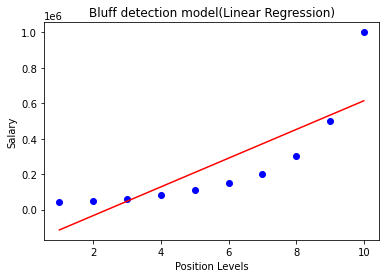

In [42]:
#Visulaizing the result for Linear Regression model  

mtp.scatter(x,y,color="blue")  
mtp.plot(x,lin_regs.predict(x), color="red")  
mtp.title("Bluff detection model(Linear Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

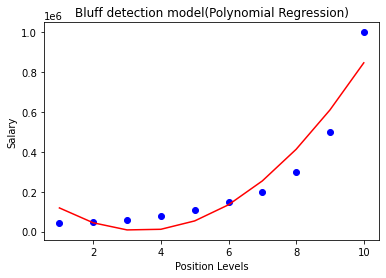

In [43]:
#Visulaizing the result for Polynomial Regression  

mtp.scatter(x,y,color="blue")  
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
mtp.title("Bluff detection model(Polynomial Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show()  

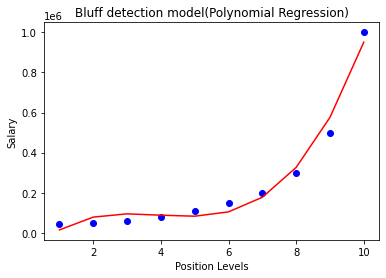

In [44]:
# Degree = 3

from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 3)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

mtp.scatter(x,y,color="blue")  
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
mtp.title("Bluff detection model(Polynomial Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show() 

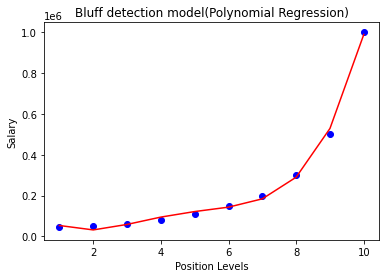

In [49]:
# Degree = 4

from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

mtp.scatter(x,y,color="blue")  
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")  
mtp.title("Bluff detection model(Polynomial Regression)")  
mtp.xlabel("Position Levels")  
mtp.ylabel("Salary")  
mtp.show() 

**Predicting the final result with the Linear Regression model:**

Now, we will predict the final output using the Linear regression model to see whether an employee is saying truth or bluff. So, for this, we will use the predict() method and will pass the value 6.5. Below is the code for it:

In [46]:
lin_pred = lin_regs.predict([[6.5]])  
print(lin_pred)  

[330378.78787879]


**Predicting the final result with the Polynomial Regression model:**

Now, we will predict the final output using the Polynomial Regression model to compare with Linear model. Below is the code for it:



In [47]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))  
print(poly_pred)  

[158862.45265153]


As we can see, the predicted output for the Polynomial Regression is [158862.45265153], which is much closer to real value hence, we can say that future employee is saying true.

## Logistic Regression

- Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
- In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
- The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
- Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
- Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:

<img src = https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png width = 350>

Note: Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

## Types of Logistic Regression

**Binary or Binomial**<br>
In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.

**Multinomial**<br>
In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

**Ordinal**<br>
In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have the scores like 0,1,2,3.

**Logistic Regression Assumptions**
Before diving into the implementation of logistic regression, we must be aware of the following assumptions about the same −

- In case of binary logistic regression, the target variables must be binary always and the desired outcome is represented by the factor level 1.
- There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other .
- We must include meaningful variables in our model.
- We should choose a large sample size for logistic regression.

**Binary Logistic Regression model**
The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0. It allows us to model a relationship between multiple predictor variables and a binary/binomial target variable. In case of logistic regression, the linear function is basically used as an input to another function such as 𝑔 in the following relation −

$hθ(x)=g(θ^Tx) \quad where \quad0≤hθ≤1$

Here, 𝑔 is the logistic or sigmoid function which can be given as follows −

$g(z)= \frac{1}{1+e^−z} \quad where \quad z=θ^Tx$

To sigmoid curve can be represented with the help of following graph. We can see the values of y-axis lie between 0 and 1 and crosses the axis at 0.5.

<img src=https://www.tutorialspoint.com/machine_learning_with_python/images/flow.jpg>

**Example:** There is a dataset given which contains the information of various users obtained from the social networking sites. There is a car making company that has recently launched a new SUV car. So the company wanted to check how many users from the dataset, wants to purchase the car.

For this problem, we will build a Machine Learning model using the Logistic regression algorithm. The dataset is shown in the below image. In this problem, we will predict the purchased variable (Dependent Variable) by using age and salary (Independent variables).

In [50]:
#Data Pre-procesing Step  
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('User_Data.csv')  
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [51]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  


In [53]:
x.shape

(400, 2)

In [55]:
y.shape

(400,)

In [57]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [58]:
x_train.shape

(300, 2)

In [59]:
y_train.shape

(300,)

In [60]:
x_test.shape

(100, 2)

In [61]:
y_test.shape

(100,)

In [63]:
# feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [64]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [65]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [66]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [67]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [68]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 65+24= 89 (Correct Output) and 8+3= 11(Incorrect Output).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


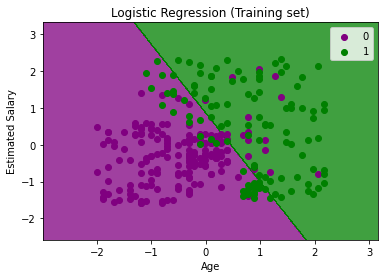

In [69]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


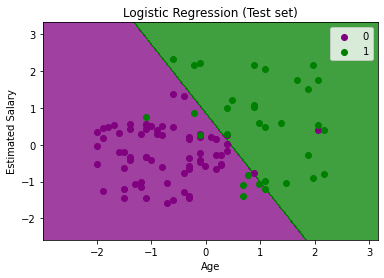

In [70]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

## Decision Tree Classification Algorithm
- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
- The decisions or the test are performed on the basis of features of the given dataset.
- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
- It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
- In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
- A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
- Below diagram explains the general structure of a decision tree:

<img src =https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png>

Note: A decision tree can contain categorical data (YES/NO) as well as numeric data.

### Why use Decision Trees?
There are various algorithms in Machine learning, so choosing the best algorithm for the given dataset and problem is the main point to remember while creating a machine learning model. Below are the two reasons for using the Decision tree:

Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
The logic behind the decision tree can be easily understood because it shows a tree-like structure.

### Decision Tree Terminologies

- Root Node: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
- Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
- Branch/Sub Tree: A tree formed by splitting the tree.
- Pruning: Pruning is the process of removing the unwanted branches from the tree.
- Parent/Child node: The root node of the tree is called the parent node, and other nodes are called the child nodes.

### How does the Decision Tree algorithm Work?

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

- Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
- Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
- Step-3: Divide the S into subsets that contains possible values for the best attributes.
- Step-4: Generate the decision tree node, which contains the best attribute.
- Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

**Example:** Suppose there is a candidate who has a job offer and wants to decide whether he should accept the offer or Not. So, to solve this problem, the decision tree starts with the root node (Salary attribute by ASM). The root node splits further into the next decision node (distance from the office) and one leaf node based on the corresponding labels. The next decision node further gets split into one decision node (Cab facility) and one leaf node. Finally, the decision node splits into two leaf nodes (Accepted offers and Declined offer). Consider the below diagram:

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm2.png>

### Attribute Selection Measures
While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

- Information Gain
- Gini Index

### Information Gain:
- Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
- It calculates how much information a feature provides us about a class.
- According to the value of information gain, we split the node and build the decision tree.
- A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

$Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)  $

**Entropy:** Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

$ Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)$ <br>

Where,

- S= Total number of samples
- P(yes)= probability of yes
- P(no)= probability of no


### Gini Index:
- Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
- An attribute with the low Gini index should be preferred as compared to the high Gini index.
- It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
- Gini index can be calculated using the below formula:<br><br>
$Gini Index= 1- ∑jPj2$

### Pruning: Getting an Optimal Decision tree

Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. There are mainly two types of tree pruning technology used:
- Cost Complexity Pruning
- Reduced Error Pruning.

In [ ]:
# Sample DT using Kyphosis dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kyphosis.csv')
df.head()

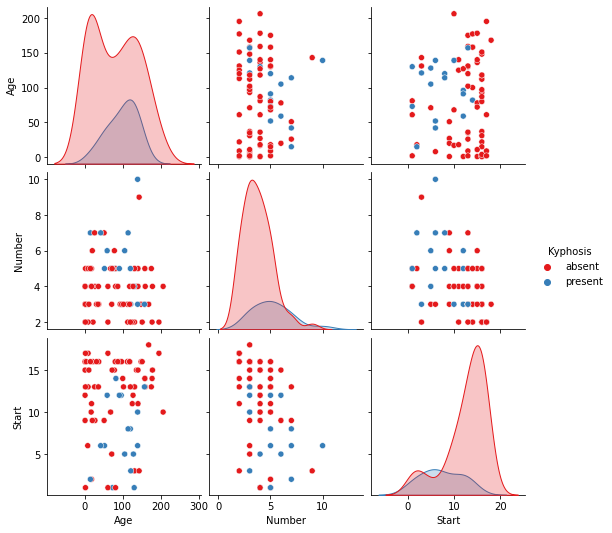

In [72]:
# Let's try to visualize
sns.pairplot(df,hue='Kyphosis',palette='Set1')


In [73]:
#Preprocessing
from sklearn.model_selection import train_test_split

X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [74]:
#Train a single DT

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine how many nodes are present and what the depth of this (very large) tree is.

The number of nodes and the maximum actual depth.

In [75]:
dtree.tree_.node_count, dtree.tree_.max_depth

(29, 6)

In [76]:
#Prediction and Evaluation

predictions = dtree.predict(X_test)


In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.80      0.80      0.80        20
     present       0.20      0.20      0.20         5

    accuracy                           0.68        25
   macro avg       0.50      0.50      0.50        25
weighted avg       0.68      0.68      0.68        25



In [78]:
#evaluate the performance using confusion matrix
print(confusion_matrix(y_test,predictions))

[[16  4]
 [ 4  1]]


In [79]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.68


In [80]:
#Create a tree visualization of the model
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features


['Age', 'Number', 'Start']

In [ ]:
# !pip install name_module

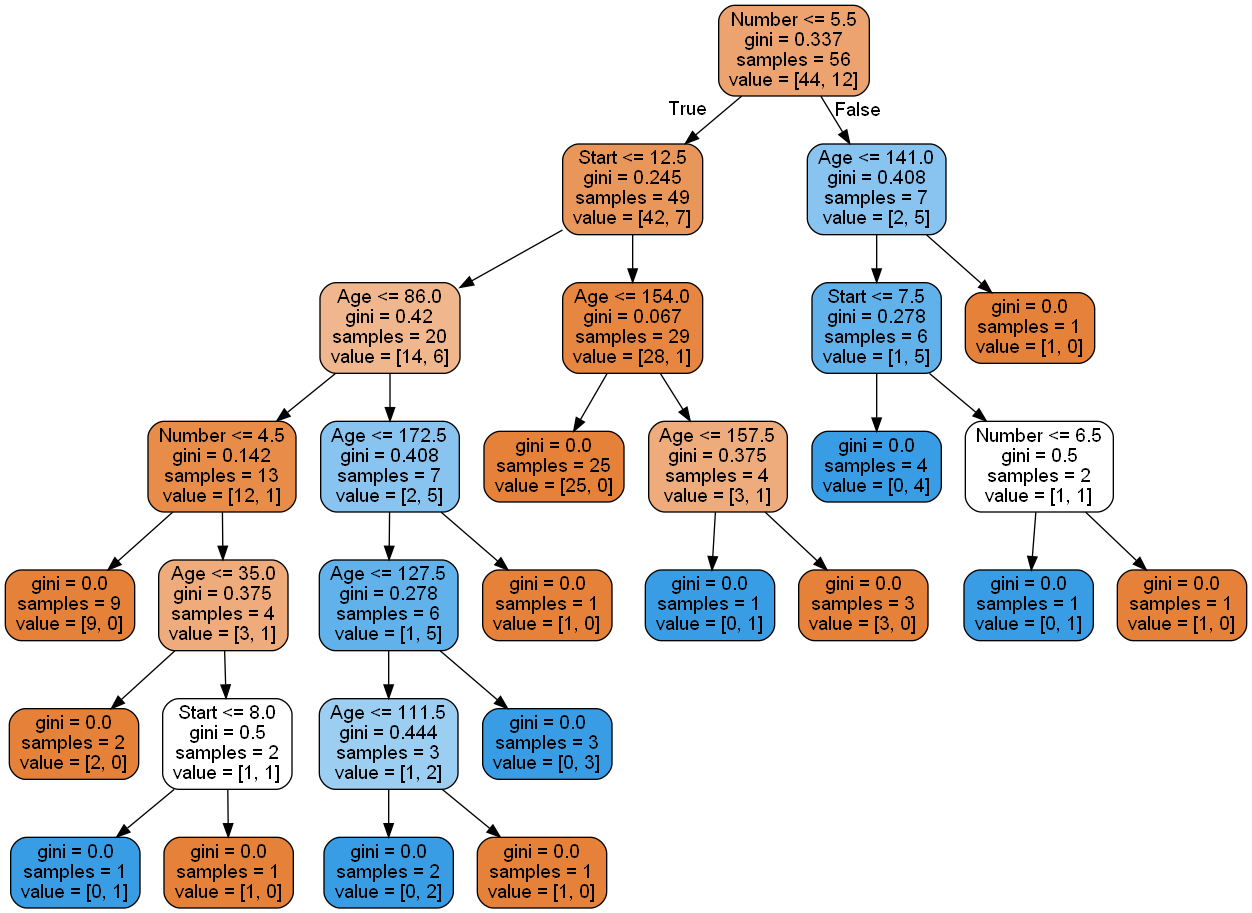

In [81]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'kyphosis .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

# Random Forest

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

### We can understand how Random Forest algorithm works with the help of the following steps :

- Step 1 − First, start with the selection of random samples from a given dataset.
- Step 2 − Next, this algorithm will construct a decision tree for every sample. Then it will get the prediction result from every decision tree.
- Step 3 − In this step, voting will be performed for every predicted result.
- Step 4 − At last, select the most voted prediction result as the final prediction result.

The following diagram will illustrate its working:
<img src=https://www.tutorialspoint.com/machine_learning_with_python/images/test_set.jpg>




In [82]:
#Sample problem for Random Forest

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# assign column names to the dataset
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# read dataset to pandas dataframe 
dataset = pd.read_csv(path, names=headernames)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
# Data Preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [85]:
# train the model with the help of RandomForestClassifier class of sklearn

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

In [86]:
#  make prediction
y_pred = classifier.predict(X_test)



In [87]:
# print the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print()
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print()
print("Accuracy:",result2)

Confusion Matrix:
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45


Accuracy: 0.9555555555555556


In [88]:
classifier.predict([[6, 3, 4, 2]])

array(['Iris-virginica'], dtype=object)

In [89]:
classifier.predict([[4, 2, 2, 1]])

array(['Iris-versicolor'], dtype=object)

In [90]:
classifier.predict([[7, 3, 7, 3]])

array(['Iris-virginica'], dtype=object)

# KNN Algorithm - Finding Nearest Neighbors

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

- Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

- Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

## How KNN Algorithm Works

K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. We can understand its working with the help of following steps −

- Step 1 − For implementing any algorithm, we need dataset. So during the first step of KNN, we must load the training as well as test data.

- Step 2 − Next, we need to choose the value of K i.e. the nearest data points. K can be any integer.

- Step 3 − For each point in the test data do the following −

- 3.1 − Calculate the distance between test data and each row of training data with the help of any of the method namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

- 3.2 − Now, based on the distance value, sort them in ascending order.

- 3.3 − Next, it will choose the top K rows from the sorted array.

- 3.4 − Now, it will assign a class to the test point based on most frequent class of these rows.

- Step 4 − End


### Example
The following is an example to understand the concept of K and working of KNN algorithm −

Suppose we have a dataset which can be plotted as follows −

<img src=https://www.tutorialspoint.com/machine_learning_with_python/images/violate.jpg>

Now, we need to classify new data point with black dot (at point 60,60) into blue or red class. We are assuming K = 3 i.e. it would find three nearest data points. It is shown in the next diagram −

<img src=https://www.tutorialspoint.com/machine_learning_with_python/images/circle.jpg>

We can see in the above diagram the three nearest neighbors of the data point with black dot. Among those three, two of them lies in Red class hence the black dot will also be assigned in red class.

# KNN as Classifier

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(path, names=headernames)
dataset.head()

In [ ]:
# experimenting with different n values
from sklearn import metrics

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

In [ ]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

# KNN as Regressor



In [ ]:
import numpy as np
import pandas as pd

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

data = pd.read_csv(path, names=headernames)
array = data.values
X = array[:,:2]
y = array[:,2]
data.shape

In [ ]:
# fit the model
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, y)

In [ ]:
# Let's see the MSE
print ("The MSE is:",format(np.power(y-knnr.predict(X),2).mean()))

### Pros and Cons of KNN
#### Pros
- It is very simple algorithm to understand and interpret.
- It is very useful for nonlinear data because there is no assumption about data in this algorithm.
- It is a versatile algorithm as we can use it for classification as well as regression.
- It has relatively high accuracy but there are much better supervised learning models than KNN.

#### Cons
- It is computationally a bit expensive algorithm because it stores all the training data.
- High memory storage required as compared to other supervised learning algorithms.
- Prediction is slow in case of big N.
- It is very sensitive to the scale of data as well as irrelevant features.

### To be continued... 